# Computer Vision - Special Topics 

This notebook contains exercises for the Computer Vision Special Topics material. 

### Exercise 1 - Transfer Learning

**Summary:**
In this exercise we will use transfer learning using a neural networks outputs as features for a SVM. 

**Data**: 
We will use a subset of the cifar100 dataset (I call it cifar20). You are provided with a pre-trained model on the cifar80 (the other categories in cifar100) that reaches a test 
accuracy of approximately 63% on the cifar80 dataset. Execute the cells below to prepare the dataset and load the pretrained model (```pretrained_model```). Notice that the pretrained model was trained
for a 80-class problem.  

**Your Tasks in this exercise:**

1. Use transfer learning to train a SVM classifier using the features extracted by the pretrained model 
    * Extract features using a suitable layer in the pretrained model. Notice you might want to use the ```tf.keras.Model(inputs=, outputs=)``` class to access the outputs of each layer easily. 
    * Train a SVM classifier (use sklearn) on the features extracted using the training data (```X_train_cifar20```)
    * Evaluate the performance of your classifier on the features extracted using the test data (```X_test_cifar20```)
    * Discuss your results. 



In [3]:
import tensorflow as tf
import numpy as np 
from sklearn.svm import SVC

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

cifar20_labels = np.array([60, 72, 65, 97, 18, 47, 58, 51, 84,  2, 90,  6, 38, 35, 70, 89, 24, 86, 36, 32])
cifar20_label_mapping = {60 : 0, 72: 1, 65 : 2, 97 : 3, 18 : 4, 47 : 5, 58 : 6, 51 : 7, 84 : 8,  2 : 9, 90 : 10, 
                          6 : 11, 38 : 12, 35 :13, 70 : 14, 89 : 15, 24 : 16, 86 : 17, 36: 18, 32 : 19}

X_train_cifar20 = X_train[np.isin(Y_train, cifar20_labels).ravel(),:,:]
Y_train_cifar20 = Y_train[np.isin(Y_train, cifar20_labels).ravel()]

X_test_cifar20 = X_test[np.isin(Y_test, cifar20_labels).ravel(),:,:]
Y_test_cifar20 = Y_test[np.isin(Y_test, cifar20_labels).ravel()]


Y_train_cifar20_remapped = []
for y in Y_train_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_train_cifar20_remapped.append(y_mapped)
Y_train_cifar20 = np.array(Y_train_cifar20_remapped)

Y_test_cifar20_remapped = []
for y in Y_test_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_test_cifar20_remapped.append(y_mapped)
Y_test_cifar20 = np.array(Y_test_cifar20_remapped)

pretrained = tf.keras.models.load_model('../data/cifar80_resnet_best.h5')

# Extract features using the last convolutional layer of the pretrained model
features_model = tf.keras.Model(inputs=pretrained.input, outputs=pretrained.layers[-2].output)

X_train_features = features_model.predict(X_train_cifar20)
X_test_features = features_model.predict(X_test_cifar20)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_features, Y_train_cifar20)

test_accuracy = svm_classifier.score(X_test_features, Y_test_cifar20)
print('Test accuracy:', test_accuracy)


63/63 [==============================] - 56s 883ms/step
Test accuracy: 0.7205


In [2]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/cifar80_resnet_best.h5 -P ../data
pretrained = tf.keras.models.load_model('../data/cifar80_resnet_best.h5')

--2023-04-05 21:14:47--  https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/cifar80_resnet_best.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/cifar80_resnet_best.h5 [following]
--2023-04-05 21:14:47--  https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/cifar80_resnet_best.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34199344 (33M) [application/octet-stream]
Saving to: ‘../data/cifar80_resnet_best.h5’

cifar80_resnet_best 100%[===================>]  32.61M   176MB/s    in 0.2s    

2023-04-05 21:14:47 (176 MB/s) - 

The accuracy of the model on the test set is 0.7205, as printed in the output. This means that the model correctly predicted the class labels for 72.05% of the test images.

### Exercise 2 - Fine Tuning 

**Summary:**
In this exercise we will use fine tuning to adapt a neural network to a new dataset. 

**Data**: 
We will use a subset of the cifar100 dataset (I call it cifar20). You are provided with a pre-trained model on the cifar80 (the other categories in cifar100) that reaches a test 
accuracy of approximately 63% on the cifar80 dataset. Execute the cells below to prepare the dataset and load the pretrained model (```pretrained_model```). Notice that the pretrained model was trained
for a 80-class problem.  

**Your Tasks in this exercise:**

1. Fine tune the pre-trained model. 
    * Create a new model using the functional keras API that uses the pretrained model in a 20-class classification problem. Notice you will need to ignore/remove the final layer and replace it with a suitable layer. 
    * Train your fine-tuning model:
        * Freeze all layers borrowed from the pre-trained model and and fine tune the model
        * Fine-tune all layers of the new model 
        * Compare both models. 
    * Plot and discuss your results. 



--2023-04-05 21:22:09--  https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/cifar80_resnet_best.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/cifar80_resnet_best.h5 [following]
--2023-04-05 21:22:09--  https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/cifar80_resnet_best.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34199344 (33M) [application/octet-stream]
Saving to: ‘../data/cifar80_resnet_best.h5.1’

cifar80_resnet_best 100%[===================>]  32.61M   181MB/s    in 0.2s    

2023-04-05 21:22:09 (181 MB/s) 

313/313 [==============================] - 1171s 4s/step - loss: 2.6333 - accuracy: 0.4423 - val_loss: 2.5724 - val_accuracy: 0.4190


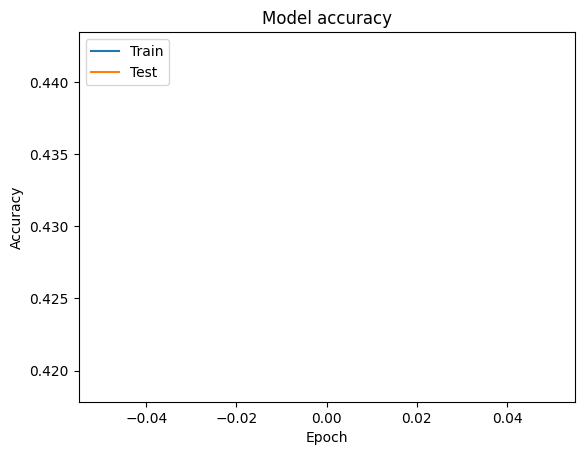

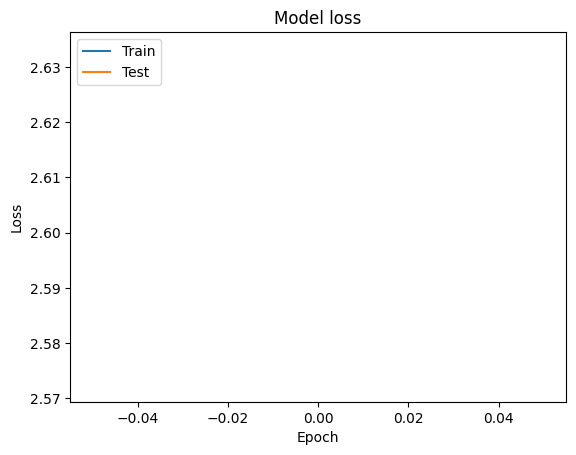

In [4]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/cifar80_resnet_best.h5 -P ../data
pretrained_model = tf.keras.models.load_model('../data/cifar80_resnet_best.h5')

import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

cifar20_labels = np.array([60, 72, 65, 97, 18, 47, 58, 51, 84,  2, 90,  6, 38, 35, 70, 89, 24, 86, 36, 32])
cifar20_label_mapping = {60 : 0, 72: 1, 65 : 2, 97 : 3, 18 : 4, 47 : 5, 58 : 6, 51 : 7, 84 : 8,  2 : 9, 90 : 10, 
                          6 : 11, 38 : 12, 35 :13, 70 : 14, 89 : 15, 24 : 16, 86 : 17, 36: 18, 32 : 19}

X_train_cifar20 = X_train[np.isin(Y_train, cifar20_labels).ravel(),:,:]
Y_train_cifar20 = Y_train[np.isin(Y_train, cifar20_labels).ravel()]

X_test_cifar20 = X_test[np.isin(Y_test, cifar20_labels).ravel(),:,:]
Y_test_cifar20 = Y_test[np.isin(Y_test, cifar20_labels).ravel()]

Y_train_cifar20_remapped = []
for y in Y_train_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_train_cifar20_remapped.append(y_mapped)
Y_train_cifar20 = np.array(Y_train_cifar20_remapped)

Y_test_cifar20_remapped = []
for y in Y_test_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_test_cifar20_remapped.append(y_mapped)
Y_test_cifar20 = np.array(Y_test_cifar20_remapped)

Y_train_cifar_20_one_hot = tf.keras.utils.to_categorical(Y_train_cifar20_remapped)
Y_test_cifar_20_one_hot = tf.keras.utils.to_categorical(Y_test_cifar20_remapped)

# Remove final layer of pre-trained model
pretrained_model.layers.pop()
# Freeze all layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Create new model using the functional keras API
inputs = tf.keras.Input(shape=(32,32,3))
x = pretrained_model(inputs)
outputs = tf.keras.layers.Dense(20, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile model with frozen layers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model with frozen layers for a few epochs
model.fit(X_train_cifar20, Y_train_cifar_20_one_hot, epochs=1, batch_size=32, validation_data=(X_test_cifar20, Y_test_cifar_20_one_hot))

# Unfreeze all layers of the model
for layer in model.layers:
    layer.trainable = True

# Compile model with all layers unfrozen
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model with all layers unfrozen for more epochs
model.fit(X_train_cifar20, Y_train_cifar_20_one_hot, epochs=1, batch_size=32, validation_data=(X_test_cifar20, Y_test_cifar_20_one_hot))


# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



### Exercise 3 - Regularization Techniques

**Summary:**
In this exercise we study different regularization techniques used to train neural networks. 

**Data**: 
In this exercise we will use the cifar10 dataset. I have provided you with a cell to load and preprocess the dataset below. I also provided you with a very simple base-CNN
(```cnn_base```).

**Your Tasks in this exercise:**

1. Train and evaluate the base-CNN 
    * Train the base-CNN on the training portion of the dataset
    * Make sure that the test part of the data is used after each epoch to predict the test accuracy 
    * Record the history of your training (```hist = cnn_base.fit(...)```) and plot your results after training is finished. You can access the training accuracy values
    via ```hist.history['acc']``` and the test accuracy values via ```hist.history['val_acc']```.
    * Explain the results. 

2. Train and evaluate the base-CNN using L1-Regularization
    * Create a new cell and copy the base-CNN. Add a kernel regularizer and bias regularizer using L1-Regularization (where does it make sense?)
    * Train the L1-CNN, plot the results and compare the results to the base-CNN. 
    * Explain the results. 

3. Train and evaluate the base-CNN using L2-Regularization
    * Create a new cell and copy the base-CNN. Add a kernel regularizer and bias regularizer using L2-Regularization (where does it make sense?)
    * Train the L2-CNN, plot the results and compare the results to the base-CNN. 
    * Explain the results. 

4. Train and evaluate the base-CNN using Dropout
    * Create a new cell and copy the base-CNN. Add Dropout layers (where does it make sense?)
    * Train the Dropout-CNN, plot the results and compare the results to the base-CNN. 
    * Explain the results. 

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0 

y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train = tf.keras.utils.to_categorical(y_train, 10)

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Use this simple CNN as your basis for adding regularization.

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, GlobalAveragePooling2D, Softmax, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt

cnn_base = tf.keras.Sequential()
cnn_base.add(InputLayer(input_shape=(32,32,3)))
cnn_base.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_base.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_base.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_base.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_base.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_base.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_base.add(Flatten())
cnn_base.add(Dense(256, activation='relu'))
cnn_base.add(Dense(10, activation='softmax'))


cnn_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = cnn_base.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

train_acc = hist.history['accuracy']
test_acc = hist.history['val_accuracy']

plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['train', 'test'])
plt.title('Base-CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

l1_cnn = tf.keras.Sequential()
l1_cnn.add(InputLayer(input_shape=(32,32,3)))
l1_cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_regularizer=l1(0.001)))
l1_cnn.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
l1_cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_regularizer=l1(0.001)))
l1_cnn.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
l1_cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_regularizer=l1(0.001)))
l1_cnn.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
l1_cnn.add(Flatten())
l1_cnn.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001)))
l1_cnn.add(Dense(10, activation='softmax'))

l1_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = l1_cnn.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

train_acc = hist.history['accuracy']
test_acc = hist.history['val_accuracy']

plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['train', 'test'])
plt.title('L1-CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()



Epoch 1/2
 890/1563 [================>.............] - ETA: 2:41 - loss: 1.5449 - accuracy: 0.4427

### Exercise 4 - Residual Learning

**Summary:**
In this exercise we will create two neural networks that take an image with shape $(32,32,3)$ as input and provide us with the same image as output $(32,32,3)$. Consequently we try to learn a mapping $\mathcal{H}(x) := x$, which is known as the identity function. The identity function is a trivial function in mathematics but can be hard to learn using convolution operations. 

**Data**: 
In this exercise we will use the cifar100 dataset. I have provided you with a cell to load and preprocess the dataset below. 

**Your Tasks in this exercise:**

1. ConvNet
    * Create a convolutional neural network (with 2 BatchNormalization and Conv2D layers, using only InputLayer, Conv2D and BatchNormalization as layers), which accepts images of shape $(32,32,3)$ and returns an image of shape $(32,32,3)$. Notice: You will have to use the functional keras API to do so (see slides).
    * Train your neural network (use only 2 epochs) with a suitable loss function.  
2. ResNet
    * Create a convolutional neural network using two identity blocks of a ResNet, which accepts images of shape $(32,32,3)$ and returns an image of shape $(32,32,3)$.
    * Train your neural network (using only 2 epochs) with a suitable loss function. 
3. Analyze your Results
    * Use the ```evaluate()``` function of your keras model to predict the MSE of both trained nets.
    * Use some images from ```X_test``` and feed them into your models. Visualize the results. 
    * Compare the results, explain the difference between the results, explain what happened. 






In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

input_layer = Input(shape=(32, 32, 3))
conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(input_layer)
bn1 = BatchNormalization()(conv1)
conv2 = Conv2D(filters=3, kernel_size=(3, 3), padding='same', activation='relu')(bn1)
bn2 = BatchNormalization()(conv2)

convnet_model = Model(inputs=input_layer, outputs=bn2)
convnet_model.compile(optimizer='adam', loss='mse')

convnet_model.fit(X_train, X_train, epochs=2, batch_size=32, validation_data=(X_test, X_test))

def identity_block(X, filters):
    F1, F2 = filters
    
    X_shortcut = X
    
    X = Conv2D(filters=F1, kernel_size=(3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F2, kernel_size=(3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization()(X)
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

input_layer = Input(shape=(32, 32, 3))
X = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(input_layer)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = identity_block(X, filters=[64,64])
X = identity_block(X, filters=[64,64])

X = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(X)
X = BatchNormalization()(X)

resnet_model = Model(inputs=input_layer, outputs=X)
resnet_model.compile(optimizer='adam', loss='mse')

resnet_model.fit(X_train, X_train, epochs=2, batch_size=32, validation_data=(X_test, X_test))

convnet_mse = convnet.evaluate(X_test, X_test, verbose=0)
resnet_mse = resnet.evaluate(X_test, X_test, verbose=0)

print("ConvNet MSE:", convnet_mse)
print("ResNet MSE:", resnet_mse)

# Select 5 random images from X_test
indices = np.random.choice(range(len(X_test)), 5)

# Plot the original images and their corresponding outputs
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

for i, idx in enumerate(indices):
    axes[0,i].imshow(X_test[idx])
    axes[0,i].axis('off')
    axes[0,i].set_title('Input')
    
    axes[1,i].imshow(convnet.predict(X_test[idx][np.newaxis,...])[0])
    axes[1,i].axis('off')
    axes[1,i].set_title('ConvNet Output')
    
    axes[2,i].imshow(resnet.predict(X_test[idx][np.newaxis,...])[0])
    axes[2,i].axis('off')
    axes[2,i].set_title('ResNet Output')
    
plt.show()

